In [14]:
import nltk
nltk.download("popular")

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

df = pd.read_csv('final_data.csv')
df = df.drop(columns = ['Unnamed: 0'])

df_fin = df[['text', 'orig_label']]
df_fin['text'] = df_fin['text'].astype('str')

MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_fin['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = tokenizer.texts_to_sequences(df_fin['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of the train data:', X.shape)

Y = pd.get_dummies(df['orig_label']).values
print('Shape of the labels:', Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

Found 32723 unique tokens.
Shape of the train data: (10469, 250)
Shape of the labels: (10469, 5)
(9422, 250) (9422, 5)
(1047, 250) (1047, 5)


In [15]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

model = Sequential([
layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
layers.Dense(64, activation = 'relu'),  
layers.Dense(32, activation = 'relu'), 
layers.Dense(16, activation = 'relu'),
layers.Flatten(), 
layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [16]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 dense_11 (Dense)            (None, 250, 64)           6464      
                                                                 
 dense_12 (Dense)            (None, 250, 32)           2080      
                                                                 
 dense_13 (Dense)            (None, 250, 16)           528       
                                                                 
 flatten_1 (Flatten)         (None, 4000)              0         
                                                                 
 dense_14 (Dense)            (None, 5)                 20005     
                                                                 
Total params: 5,029,077
Trainable params: 5,029,077
No

In [17]:
epochs = 5
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
133/133 [==============================] - 12s 87ms/step - loss: 0.7339 - accuracy: 0.8105 - val_loss: 0.6851 - val_accuracy: 0.8081
Epoch 2/5
133/133 [==============================] - 11s 84ms/step - loss: 0.5869 - accuracy: 0.8153 - val_loss: 0.6681 - val_accuracy: 0.8102
Epoch 3/5
133/133 [==============================] - 13s 96ms/step - loss: 0.3890 - accuracy: 0.8569 - val_loss: 0.8163 - val_accuracy: 0.7964
Epoch 4/5
133/133 [==============================] - 11s 85ms/step - loss: 0.2450 - accuracy: 0.9114 - val_loss: 1.1590 - val_accuracy: 0.7953
Epoch 5/5
133/133 [==============================] - 11s 84ms/step - loss: 0.1191 - accuracy: 0.9603 - val_loss: 1.4454 - val_accuracy: 0.7359


In [18]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

33/33 [==============================] - 0s 8ms/step - loss: 1.4216 - accuracy: 0.7507
Test set
  Loss: 1.422
  Accuracy: 0.751


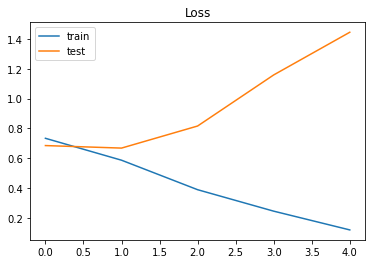

In [19]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

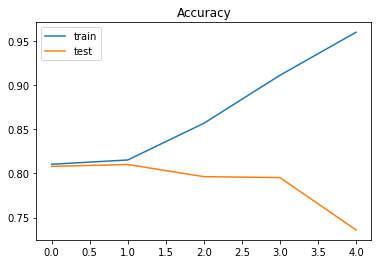

In [20]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();